In [32]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
data = pd.read_csv("project csv")

In [3]:
data.head()

,Stock Code,Date,epoch timestamp,open,high,low,close,volume,adjclose
0,ADT,2/8/2019,1549636200,7.56,7.67,7.485,7.65,1007100.0,6.916444
1,ADT,2/7/2019,1549549800,7.60,7.72,7.515,7.59,1344000.0,6.862197
2,ADT,2/6/2019,1549463400,7.56,7.68,7.520,7.64,1531700.0,6.907403
3,ADT,2/5/2019,1549377000,7.63,7.79,7.490,7.57,1878400.0,6.844115
4,ADT,2/4/2019,1549290600,7.32,7.61,7.284,7.58,2580700.0,6.853156


In [4]:
stock_group = data.groupby("Date")
mstock_group=stock_group.mean()
count_stock = stock_group["Stock Code"].count()

mstock_group.head(10)

close=data.set_index("Stock Code")

close2=close.groupby("Stock Code")

close2.head(10)

opendata=data.loc[data["Date"] == "1/28/2019", :]

opendata.head(10)

closedata=data.loc[data["Date"] == "2/8/2019", :]
closedata.head()

opendata.head(10)

removeoutliersod=opendata.drop([19, 69,149])

removeoutliersod.head(8)

removeoutlierscd=closedata.drop([10, 60,140])
removeoutlierscd.head(18)

opendata.head(20)

onlyoutliersod=opendata.drop([9,29,39,49,59,79,89,99,109,119,129,139,159,169,179])

onlyoutliersod.head()

closedata.head(20)

onlyoutlierscd=closedata.drop([0,20,30,40,50,70,80,90,100,110,120,130,150,160,170])
onlyoutlierscd.head()

mstock_group.head()

,epoch timestamp,open,high,low,close,volume,adjclose
Date,,,,,,,
1/28/2019,1548685800,243.448885,244.582332,240.330553,242.691110,6.423789e+06,241.361721
1/29/2019,1548772200,242.337225,243.168887,238.392498,239.398891,6.535606e+06,238.073320
1/30/2019,1548858600,241.828332,246.976109,240.816113,245.844447,7.375756e+06,244.510958
1/31/2019,1548945000,247.648886,252.963894,246.214996,251.040000,9.951344e+06,249.688754
2/1/2019,1549031400,246.433893,249.648894,244.113612,245.349998,6.480722e+06,243.999909


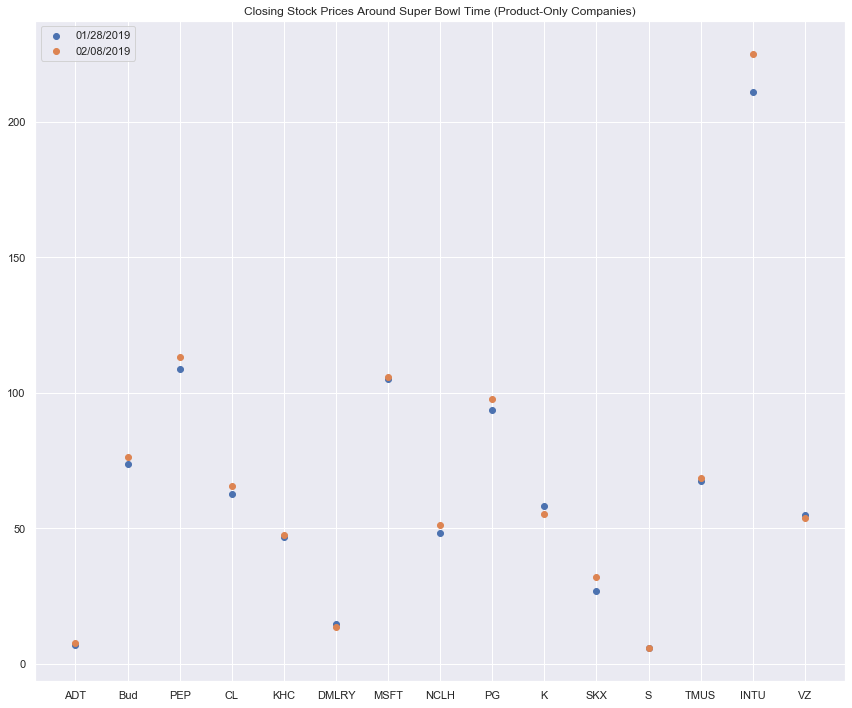

In [33]:
plt.figure(figsize=(12,10))
sns.set()
plt.scatter("Stock Code", "close", data=removeoutliersod, label="01/28/2019")
plt.scatter("Stock Code","close",data=removeoutlierscd, label="02/08/2019")
plt.title("Closing Stock Prices Around Super Bowl Time (Product-Only Companies)")
plt.set_xlabel=("Stock Code")
plt.set_ylabel=("Closing Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("NoOutlierClose.png")
plt.show()

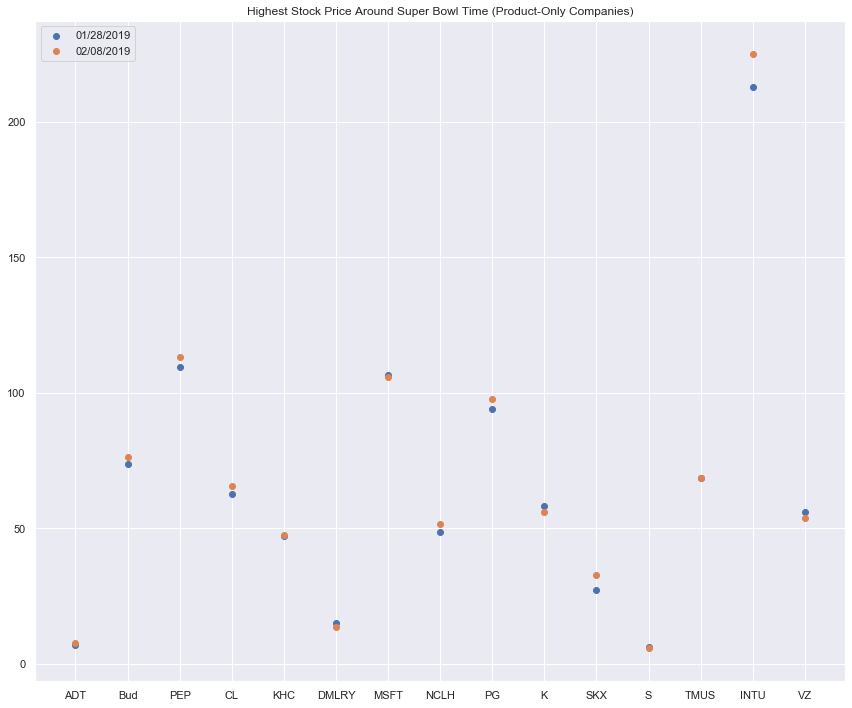

In [34]:
plt.figure(figsize=(12,10))
sns.set()
plt.grid(True)
plt.scatter("Stock Code", "high", data=removeoutliersod, label="01/28/2019")
plt.scatter("Stock Code","high",data=removeoutlierscd, label="02/08/2019")
plt.title("Highest Stock Price Around Super Bowl Time (Product-Only Companies)")
plt.set_xlabel=("Stock Code")
plt.set_ylabel=("Closing Price")
plt.legend()
plt.tight_layout()
plt.savefig("NoOutlierHigh.png")
plt.show()

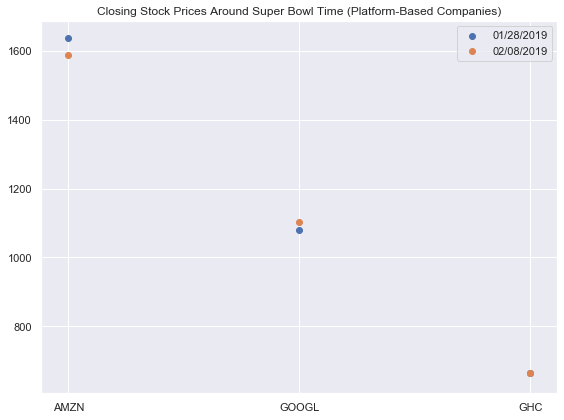

In [35]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter("Stock Code", "close", data=onlyoutliersod, label="01/28/2019")
plt.scatter("Stock Code","close",data=onlyoutlierscd, label="02/08/2019")
plt.title("Closing Stock Prices Around Super Bowl Time (Platform-Based Companies)")
plt.set_xlabel=("Stock Code")
plt.set_ylabel=("Closing Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("OnlyOutlierClose.png")
plt.show()

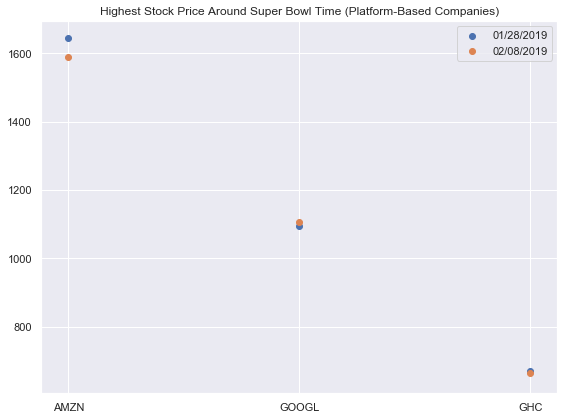

In [36]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter("Stock Code", "high", data=onlyoutliersod, label="01/28/2019")
plt.scatter("Stock Code","high",data=onlyoutlierscd, label="02/08/2019")
plt.title("Highest Stock Price Around Super Bowl Time (Platform-Based Companies)")
plt.set_xlabel=("Stock Code")
plt.set_ylabel=("Closing Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("OnlyOutlierHigh.png")
plt.show()

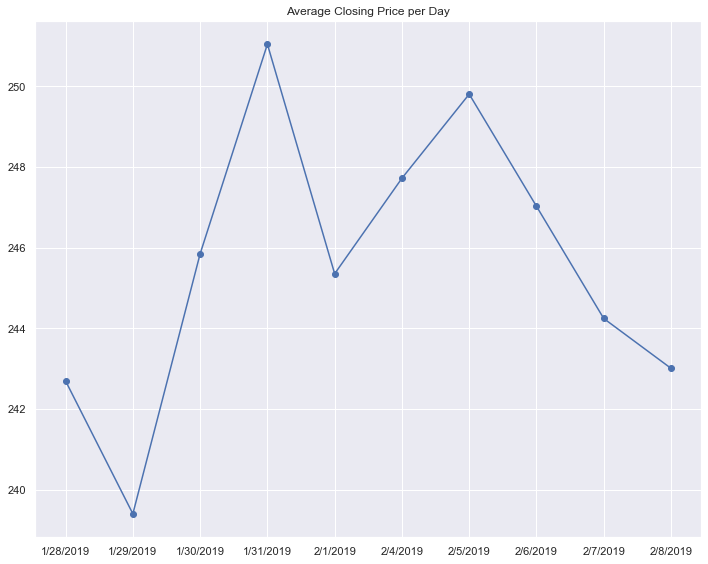

In [37]:
plt.figure(figsize=(10,8))
sns.set()
plt.plot(mstock_group.index, "close",data=mstock_group, marker="o")
plt.title("Average Closing Price per Day")
plt.set_xlabel=("Date")
plt.set_ylabel=("Closing Price")
plt.grid(True)
plt.tight_layout()
plt.savefig("AvgDailyClose.png")
plt.show()

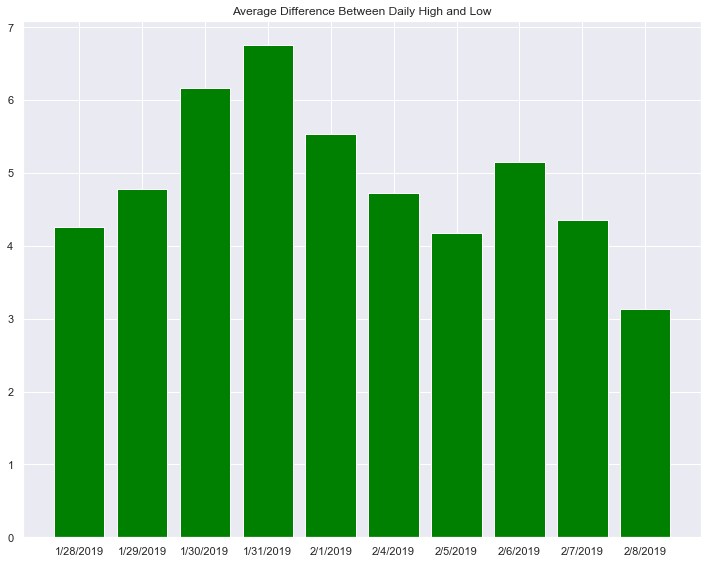

In [38]:
mstock_avg_change = mstock_group.high - mstock_group.low

plt.figure(figsize=(10,8))
sns.set()
plt.bar(mstock_group.index, mstock_avg_change, data=mstock_group, color="green")
plt.title("Average Difference Between Daily High and Low")
plt.set_xlabel=("Date")
plt.set_ylabel=("Average of Differences")
plt.tight_layout()
plt.savefig("AvgDailyDifference.png")
plt.show()

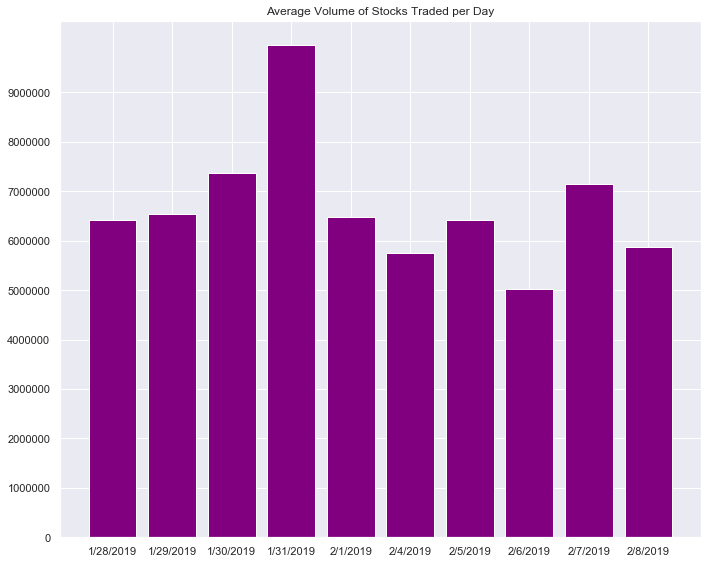

In [39]:
plt.figure(figsize=(10,8))
sns.set()
plt.bar(mstock_group.index, "volume", data=mstock_group, color="purple")
plt.xlabel=("Date")
plt.ylabel=("Average Volume Traded")
plt.title("Average Volume of Stocks Traded per Day")
plt.yticks(np.arange(0, 10000000, 1000000))
plt.tight_layout()
plt.savefig("AvgVolume.png")
plt.show()